### Sentiment analysis
#### Aim: quantify sentiments of students' review of the course and use that score for statistical analysis

#### dataset:  Course Reviews University of Waterloo
https://www.kaggle.com/datasets/anthonysusevski/course-reviews-university-of-waterloo

In [1]:
#install if anaconda does not have NLTK package
#conda install -c anaconda nltk

In [2]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
nltk.download('vader_lexicon')
#import operator

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/tey15/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

Import csv files into pandas dataframe

In [3]:
df=pd.read_csv('course_data_clean.csv')

In [4]:
df["row_id"] = df.index + 1

In [5]:
df.head()

,course_code,course_title,num_ratings,useful,easy,liked,num_reviews,reviews,course_rating,course_rating_int,row_id
0,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,go to office hours and practice,liked course,1.0,1
1,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,One of my least favourite courses. Although th...,disliked course,0.0,2
2,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,It starts with a very low pace but after midte...,disliked course,0.0,3
3,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,Took this in 2018 with no programming experien...,liked course,1.0,4
4,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,I loved everything about cs 115. Great instruc...,liked course,1.0,5


### preprocessing

In [6]:
#remove all non-aphabet character
#df['reviews'] = df['reviews'].str.replace("[^a-zA-Z#]", " ")

#covert to lower-case
df['reviews'] = df['reviews'].str.casefold()
df.shape[0]

14838

In [7]:
df.reviews.apply(type).value_counts()

<class 'str'>      14829
<class 'float'>        9
Name: reviews, dtype: int64

In [8]:
df[df.reviews.apply(type) == float]

,course_code,course_title,num_ratings,useful,easy,liked,num_reviews,reviews,course_rating,course_rating_int,row_id
2810,SPCOM 223,Public Speaking,498,68%,73%,71%,125,NaN,disliked course,0.0,2811
5982,PSYCH 207,Cognitive Processes,165,75%,75%,75%,39,NaN,disliked course,0.0,5983
6540,COOP 2,Co-operative Work Term,136,93%,84%,95%,7,NaN,liked course,1.0,6541
6578,ARBUS 101,Introduction to Business in North America,135,52%,67%,43%,30,NaN,disliked course,0.0,6579
8311,PD 5,Project Management,80,37%,74%,25%,12,NaN,disliked course,0.0,8312
8373,AHS 107,"Sociology of Activity, Health, and Well-being",78,27%,93%,40%,27,NaN,NaN,NaN,8374
10542,ECE 458,Computer Security,39,91%,57%,77%,6,NaN,disliked course,0.0,10543
11287,WKRPT 400M,Work-term Report,31,0%,20%,6%,3,NaN,disliked course,0.0,11288
11395,BIOL 266,Introduction to Computational Biology,29,90%,68%,83%,10,NaN,liked course,1.0,11396


remove 9 cases that have missing for reviews for simplicity

In [9]:
df = df.dropna(subset=['reviews'])

In [10]:
df.reviews.apply(type).value_counts()

<class 'str'>    14829
Name: reviews, dtype: int64

In [11]:
df['polarity'] = df['reviews'].apply(lambda x: analyzer.polarity_scores(x))


In [12]:
df.head()

,course_code,course_title,num_ratings,useful,easy,liked,num_reviews,reviews,course_rating,course_rating_int,row_id,polarity
0,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,go to office hours and practice,liked course,1.0,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,one of my least favourite courses. although th...,disliked course,0.0,2,"{'neg': 0.065, 'neu': 0.672, 'pos': 0.264, 'co..."
2,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,it starts with a very low pace but after midte...,disliked course,0.0,3,"{'neg': 0.11, 'neu': 0.636, 'pos': 0.253, 'com..."
3,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,took this in 2018 with no programming experien...,liked course,1.0,4,"{'neg': 0.148, 'neu': 0.733, 'pos': 0.119, 'co..."
4,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,i loved everything about cs 115. great instruc...,liked course,1.0,5,"{'neg': 0.096, 'neu': 0.482, 'pos': 0.423, 'co..."


In [13]:
df = pd.concat(
    [df.drop(['polarity'], axis=1), 
     df['polarity'].apply(pd.Series)], axis=1)
df.head(3)

,course_code,course_title,num_ratings,useful,easy,liked,num_reviews,reviews,course_rating,course_rating_int,row_id,neg,neu,pos,compound
0,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,go to office hours and practice,liked course,1.0,1,0.000,1.000,0.000,0.0000
1,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,one of my least favourite courses. although th...,disliked course,0.0,2,0.065,0.672,0.264,0.8070
2,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,it starts with a very low pace but after midte...,disliked course,0.0,3,0.110,0.636,0.253,0.9464


In [14]:
# Create new variable with sentiment "neutral," "positive" and "negative"
df['sentiment'] = df['compound'].apply(lambda x: 'positive' if x >0 else 'neutral' if x==0 else 'negative')
df.head(4)

,course_code,course_title,num_ratings,useful,easy,liked,num_reviews,reviews,course_rating,course_rating_int,row_id,neg,neu,pos,compound,sentiment
0,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,go to office hours and practice,liked course,1.0,1,0.000,1.000,0.000,0.0000,neutral
1,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,one of my least favourite courses. although th...,disliked course,0.0,2,0.065,0.672,0.264,0.8070,positive
2,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,it starts with a very low pace but after midte...,disliked course,0.0,3,0.110,0.636,0.253,0.9464,positive
3,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,took this in 2018 with no programming experien...,liked course,1.0,4,0.148,0.733,0.119,-0.3712,negative


In [15]:
df["compound"].describe()

count    14829.000000
mean         0.372065
std          0.508664
min         -0.993300
25%          0.000000
50%          0.493900
75%          0.802000
max          0.997700
Name: compound, dtype: float64

<AxesSubplot:xlabel='count', ylabel='sentiment'>

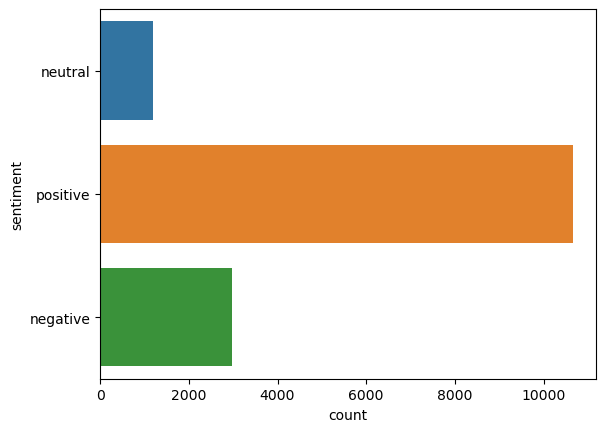

In [16]:
sns.countplot(y='sentiment', data=df)

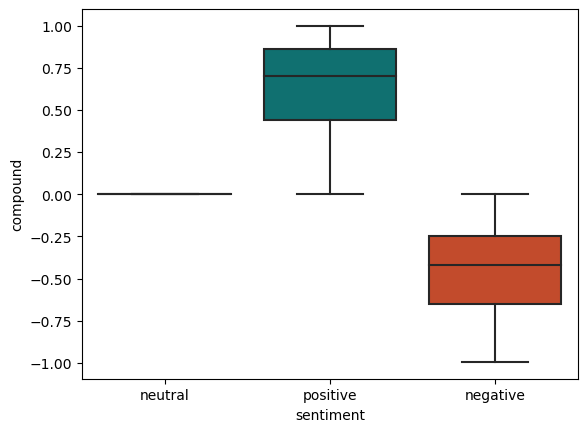

In [17]:
sns.boxplot(y='compound', 
            x='sentiment',
            palette=['#b2d8d8',"#008080", '#db3d13'], 
            data=df);

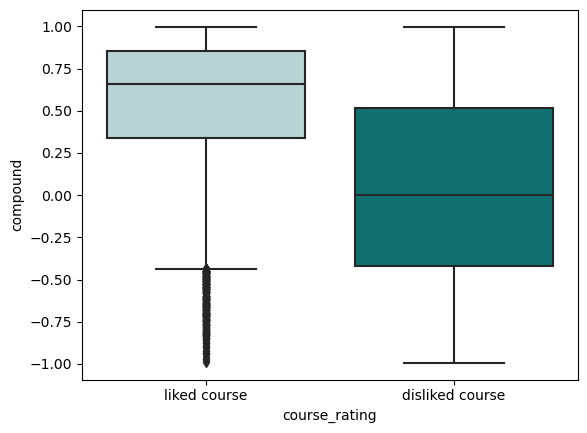

In [18]:
sns.boxplot(y='compound', 
            x='course_rating',
            palette=['#b2d8d8',"#008080", '#db3d13'], 
            data=df);

#### rate individual sentences within the review and aggregate
https://realpython.com/python-nltk-sentiment-analysis/

In [19]:
df["row_id"]

0            1
1            2
2            3
3            4
4            5
         ...  
14833    14834
14834    14835
14835    14836
14836    14837
14837    14838
Name: row_id, Length: 14829, dtype: int64

In [20]:
#from statistics import mean
from nltk.tokenize import sent_tokenize, word_tokenize
df['polarity'] = df['reviews'].apply(lambda x: analyzer.polarity_scores(x))


tokenize by sentences
https://stackoverflow.com/questions/33098040/how-to-use-word-tokenize-in-data-frame

In [21]:
df['tokenized_reviews'] = df.apply(lambda row: nltk.sent_tokenize(row['reviews']), axis=1)

In [22]:
list=df['tokenized_reviews']

In [23]:
for row in df["tokenized_reviews"]:
    total=0
    count=0
    for element in row:
        total+=analyzer.polarity_scores(element)["compound"]
        count+=1
    if count >0:
        average=total/count
        print(average)
    else:
        print("Row is empty.")

0.0
0.28253333333333336
0.383725
-0.107325
0.57085
0.24347499999999997
0.37696250000000003
0.2843125
0.02044999999999998
0.6064499999999999
-0.15423333333333333
0.37575000000000003
0.546
0.2827
0.3443833333333333
0.7104
-0.23345
0.24206666666666665
-0.042300000000000004
0.7184666666666667
-0.044199999999999996
-0.4201
-0.01761428571428571
0.0
0.5240666666666667
0.4927
0.4674
0.38683333333333336
0.0258
0.46704999999999997
0.1997
0.5085666666666667
-0.125
0.5106
-0.5719
0.22365000000000002
0.48095000000000004
0.5793
0.2873
0.5994
0.019799999999999998
0.4927
0.5542
-0.0258
0.7269
0.4696
0.11883333333333335
0.4058
-0.6297
0.13648
0.6994
0.0
0.6249
0.2781
0.0
0.07522499999999999
0.6124
0.2202
0.0
-0.296
0.43095
-0.1741
0.3498333333333334
0.4404
-0.6917
0.25433333333333336
0.06092000000000001
0.30025
0.1754
0.398625
0.6093500000000001
0.4404
0.4404
0.22278000000000003
-0.017499999999999988
0.7746
-0.2051
0.8006
0.6808
0.4215
0.3612
-0.1027
0.4601
0.6908
0.0
-0.026524999999999993
0.4588
0.584

-0.017424999999999996
0.4404
0.38075000000000003
0.35966666666666675
0.0
-0.179675
0.6626333333333333
0.6194000000000001
0.12587500000000001
0.2569666666666666
0.7264
0.0
0.24383333333333335
0.4404
0.15253333333333333
0.6759
-0.5579
-0.047920000000000004
0.6588
0.21075
0.36345
0.5106
0.38255
0.2335888888888889
0.32330000000000003
0.10115
0.4404
0.16038000000000002
0.5822
0.28705
0.8221
0.7264
0.1354
0.0381
0.25943333333333335
-0.156225
0.61485
0.0
0.7269
0.0
0.5028
0.6588
0.7645
0.6369
0.19786666666666666
0.0
0.5699
0.0
0.8402
0.1901
-0.12564999999999998
0.11380000000000001
0.2023
0.5574
0.23835
0.296
-0.15835
-0.14250000000000002
0.53755
0.3182
0.2779333333333333
0.2924
0.4588
0.4576
0.2202
0.24833333333333332
0.296
0.2382
0.7777
0.27115
0.21186666666666665
0.59894
0.0
0.4404
0.06275
0.3804
0.0
0.2846
0.5222
-0.092
0.4256
0.7346
-0.29685
0.7841
0.24635
-0.05135
0.22142499999999998
0.6808
-0.5327333333333333
-0.012199999999999989
0.2382
0.7579
0.37924285714285716
0.431
0.6038
0.6808
0.

0.201725
0.35015
-0.16260000000000002
-0.30013333333333336
0.3802
0.0772
0.7391
0.297
-0.30015000000000003
0.5537
0.6048
0.36316249999999994
0.802
0.1406
0.5917666666666667
-0.02068000000000002
-0.2785
0.06669999999999998
0.1803
0.38458333333333333
0.0
0.18758333333333332
0.8043
0.6102333333333334
-0.06538
0.333525
0.39219999999999994
0.11374166666666664
0.35903333333333337
0.10536666666666666
-0.2059
0.06950000000000003
0.5647
0.52215
0.16585714285714287
0.209525
0.2695
0.2781
0.48906
-0.11825000000000001
-0.4330625
0.18495
-0.07300000000000001
0.22455
0.07150000000000001
-0.06338749999999999
0.23136666666666664
-0.18251666666666666
-0.148
0.6496272727272727
0.43732
0.6241
0.07558000000000001
0.4128833333333333
0.1888857142857143
0.07475000000000001
0.09970000000000001
-0.4019
0.7253000000000001
0.0
0.09813333333333334
-0.1204
-0.043933333333333345
-0.1848
0.1147
-0.2973
0.449
0.6003
0.6396666666666667
-0.5423
0.0
0.4404
0.0
0.8919
0.50335
0.6027
0.572
0.0
0.08820000000000001
0.528825

-0.19441
-0.4201
-0.42685
-0.19099999999999998
0.11161666666666668
-0.024933333333333346
0.01951250000000003
-0.2661
0.06421666666666667
0.296
0.16789999999999997
0.1206
0.08194999999999997
-0.012924999999999992
0.04625000000000001
0.66725
-0.7687
-0.02007500000000001
0.3506
0.273
0.0
0.7713
0.6535500000000001
-0.1245
0.6369
0.1901
0.009800000000000003
0.12788
0.3448
0.702075
0.4404
0.146675
-0.2457
0.4404
0.05135
0.26364
0.2202
0.2202
0.4023666666666667
-0.012225000000000014
-0.01783333333333333
0.25
-0.13813333333333333
0.8679
0.5106
-0.3182
0.2202
0.0757
-0.1429
0.14075
0.2716
-0.1706
0.07655
0.23085
0.2023
0.736
0.21075
0.0
0.21075
-0.11480000000000001
0.11029999999999998
0.7045999999999999
0.44789999999999996
0.4404
0.0
0.4215
0.5046
0.37995
0.57125
0.32005
-0.05606666666666666
0.14405
0.34735
0.6682
0.0
0.0
0.4939
0.24695
0.8402
0.19623333333333334
0.0
-0.1283
-0.4517
0.3632
0.36345
0.4215
0.38075000000000003
0.6588
0.0
0.0
0.10115
0.8074
0.3225
0.24695
0.0
0.5106
0.0
0.0
0.2202


0.10115
0.0
0.8748
0.28476666666666667
0.31665
0.13775
0.7269
0.5256
0.34
0.4423
-0.0891
0.7003
0.17452
0.4224333333333334
0.2646
0.32015
0.36345
0.0
0.39915
-0.4828
0.061100000000000015
-0.36360000000000003
0.0
0.2191
0.37929999999999997
0.1191
0.31984999999999997
0.4160000000000001
0.00645
0.2213
-0.14018571428571427
0.0
0.0
0.69
0.33755
0.6115
-0.3804
0.2263
-0.18985000000000002
-0.1329
0.08196666666666667
0.10534000000000003
-0.2732
0.11315
-0.4754
0.4215
0.3884
-0.1902
0.0
-0.12595
0.4404
-0.5849
0.7845
0.007700000000000003
0.0
-0.7162
0.0
0.6815
0.0
-0.3182
0.20095
0.0
-0.128
-0.12765
0.0
0.0
-0.2539666666666667
-0.6249
-0.0013599999999999945
0.25
0.60895
0.09816666666666667
0.69185
0.035050000000000026
-0.4576
0.41315999999999997
-0.16366666666666665
-0.5423
0.13396666666666665
0.5701
0.381575
-0.16985
0.5399
-0.17034000000000002
0.12040000000000001
0.807
-0.101825
0.709825
-0.215
-0.134825
0.09466666666666668
-0.4215
-0.0541
0.28463333333333335
-0.023325000000000005
-0.01801818

0.3737333333333333
0.41555
0.6901
0.0
0.2997
0.5647
0.79515
0.345125
0.31245
0.03480000000000001
0.0
-0.015775000000000004
0.17136666666666664
0.4019
-0.19155
0.6185
0.3595
0.4176
0.03673333333333333
0.2202
0.28683333333333333
0.32513333333333333
0.19754999999999998
-0.3182
0.1534
0.09820000000000001
0.41806666666666664
0.52294
0.2382
0.4576
0.476375
0.4201
0.70645
0.10115
0.246525
0.20417999999999997
0.4464333333333334
0.21120000000000003
0.412025
0.0
0.33180000000000004
0.63425
0.21248333333333336
0.31668333333333337
0.2463
0.2289
0.41905
0.7003
0.0
0.42775
0.0138
0.06157499999999999
0.12459999999999999
0.14676666666666666
-0.031525
-0.10620000000000002
0.2824642857142857
0.03419999999999998
-0.13618750000000002
0.8338
-0.04473999999999999
0.406525
0.7269
0.27953333333333336
0.1250166666666667
0.2145967741935484
-0.14025
0.6969000000000001
0.001833333333333335
-0.14595000000000002
0.7615
-0.0723
0.09046666666666665
0.0
0.5234333333333333
0.1909
0.09594
0.0
0.07102499999999999
0.2277


0.49545
0.2663
0.4737333333333333
0.4019
0.4521
0.18906666666666663
0.47035
0.24228
0.2590666666666667
0.045
0.9259
0.28545
0.32405
0.16102
0.0
0.3237
0.4576
-0.297
0.7499
0.05516666666666667
0.37706666666666666
0.872
0.33799999999999997
0.46609999999999996
0.0
-0.04365
0.296
0.6746
0.27876666666666666
0.230825
0.1075666666666667
0.7425999999999999
-0.0772
0.14049999999999999
0.06743333333333333
-0.6124
0.008775000000000005
-0.1027
0.6858
-0.08025000000000002
0.0812
0.09689999999999999
0.0
0.2202
0.10810000000000002
0.4019
0.11116666666666665
0.3077666666666667
0.22379999999999997
0.3497
0.4927
0.2185
0.1113857142857143
-0.07050000000000001
0.4404
-0.04846666666666664
-0.5893
-0.4333
-0.2686
0.4393
0.5994
0.2915666666666667
0.77075
0.3192
0.2767
0.06816666666666664
0.19756666666666667
0.4679
-0.2465
-0.2787
0.4404
0.2666
-0.12186666666666666
0.12205000000000002
0.7876
0.6800333333333333
0.516
0.4404
-0.0516
0.4215
0.3167
0.0
0.5251
0.4118
0.52045
0.5267
0.3804
-0.46153333333333335
-0.1

0.4917
-0.3393
0.3361
0.7065250000000001
0.6808
-0.1965
0.5717
0.51145
-0.2263
0.8873
0.1671
0.2732
0.06871999999999999
-0.3612
0.0
-0.23179999999999998
-0.20905
-0.14005000000000004
-0.058328571428571396
0.09830000000000001
-0.41605000000000003
0.0129
-0.3478230769230769
0.6266999999999999
-0.06976
-0.2237333333333333
0.22693333333333332
-0.250575
-0.0772
0.04704999999999998
0.3332
0.166
0.2199
0.1072
-0.4767
0.8416
-0.05103333333333334
0.54288
0.27495
-0.14710000000000004
0.0
0.0
0.2202
-0.18345555555555557
0.383575
0.305375
0.313925
-0.10488750000000002
0.19658333333333333
0.585475
0.2841
0.017000000000000015
0.5096
0.0625
0.6497666666666667
-0.40954999999999997
0.3299
0.45395
0.41143
-0.18745
0.305275
0.3374333333333333
0.4788333333333334
-0.131
0.31364
0.5499
0.11902857142857141
0.0877
-0.03252222222222224
0.165525
0.4404
0.8519
0.061100000000000015
-0.128
0.4927
0.55855
0.0
0.10485
0.10115
0.2265
0.42965
0.1808
0.6648333333333333
0.46525
-0.6705
0.1745
0.44895
-0.15988
0.85
0.338

0.6634166666666665
0.5426666666666667
-0.26335
-0.1393
0.10052000000000001
0.5257000000000001
0.13775
0.4918
0.6249
0.1511
0.059599999999999986
0.30328
0.3909
0.0
-0.24240000000000003
0.048799999999999996
-0.2023
0.0
-0.4215
0.7597
0.16885
-0.296
0.5459400000000001
-0.21589999999999998
0.2382
-0.0129
-0.03423333333333333
0.0
-0.25
-0.27985
-0.08795
0.36345
0.8845
0.6422333333333333
0.39925
0.6857399999999999
0.2704
-0.08795
0.08568
0.31245
0.13755
0.44126666666666664
-0.07865
0.10212000000000002
0.13396666666666665
0.031999999999999994
0.26803333333333335
0.14445
0.2951666666666667
-0.07533333333333332
0.12518
0.0
0.24546666666666664
0.6107
-0.06661875
0.7269
0.7146
0.12798
-0.11373333333333334
0.4404
0.75395
-0.47256666666666663
0.06703333333333332
0.4404
-0.140325
0.022249999999999992
0.2263
0.0
0.28321999999999997
0.0
0.29115714285714284
0.4215
0.0
0.3315
0.7778
0.0
0.39113333333333333
0.33658
0.4927
0.2083
0.36493333333333333
0.3951
0.4404
0.20515
0.1268
0.21810000000000002
0.4094


0.12990000000000002
0.09836666666666666
0.7047
-0.077025
0.18690000000000004
0.17156666666666667
-0.08712857142857142
-0.064
-0.06795
0.3255
-0.26095
0.2006
0.4826
0.2023
0.1975
0.5719
0.062040000000000005
0.01796666666666667
0.37929999999999997
0.07721666666666667
0.12229999999999999
0.8625
0.2263
0.42873333333333336
0.4404
0.3041666666666667
-0.296
0.69495
0.110975
0.48285
0.6119
0.043719999999999995
0.25286666666666663
0.54145
0.74055
0.5691999999999999
0.198
0.37697499999999995
0.7172
0.50245
0.53855
0.2718
-0.25295
0.16423333333333334
0.575
0.4588
0.6808
-0.09073333333333333
-0.04192499999999999
0.14880000000000002
0.17
0.053285714285714283
-0.2202
0.3454
0.32506666666666667
0.4772666666666667
0.7783
0.15502500000000002
0.0
0.2733666666666667
0.38786666666666664
0.3804
0.4432333333333333
0.41473333333333323
0.0
0.1591
0.0
0.6712
-0.0951
0.5473
-0.3291
0.013300000000000001
-0.1263
0.02
0.5236
-0.6124
0.2202
0.43805
0.127025
0.3182
-0.21075
0.2083
-0.296
-0.4215
0.7783
-0.2755
0.484

0.4927
0.1298
-0.004933333333333345
0.53895
0.1095
0.05469999999999999
0.2466
0.06743333333333333
0.31845
0.0
0.0
0.3585333333333333
0.7269
0.256575
0.5445
-0.19576666666666667
0.11315
0.48465
0.41635
0.56345
0.0
0.0706
0.26602000000000003
0.1806
0.40630000000000005
0.0
0.3784
0.743
0.0
0.0
-0.05456666666666666
0.05435000000000004
-0.1245
-0.27115
0.041800000000000004
0.05135
0.1364
0.09106666666666667
0.4037
-0.5719
-0.1461
0.0
0.0
-0.08149999999999999
0.2553
0.42513333333333336
0.3502
0.44589999999999996
-0.05352857142857141
0.50234
0.29655
0.37000000000000005
0.1779
0.19884999999999997
0.16453333333333334
0.12040000000000001
-0.3947
-0.5423
-0.05135
0.1779
0.5622333333333333
0.037950000000000005
0.6533
0.2793
0.8625
0.5803
-0.31245
0.4404
0.0758
0.29169999999999996
0.4404
0.310675
0.7544500000000001
0.4215
-0.13775
0.5106
0.27959999999999996
-0.021150000000000002
0.21004
-0.3412
-0.27555
0.1263
-0.14223333333333335
0.2263
0.4574
0.38902499999999995
0.8128
0.25
0.39786666666666665
0.

0.16185999999999998
0.32985
0.09340000000000004
-0.1027
0.2919714285714286
0.21998
0.61815
0.7269
0.0
-0.3804
0.0952
0.5623666666666667
0.0
0.2202
0.3740333333333333
-0.30416666666666664
0.2202
0.21075
0.61175
0.8779
-0.02009999999999999
-0.0129
0.0
0.3417666666666667
0.3499666666666667
0.3530666666666667
0.6369
-0.2944
0.7269
0.2434
0.2732
-0.07075
-0.296
0.35458
0.22812500000000002
0.28079999999999994
-0.09985
-0.3079
0.4418666666666667
-0.09956666666666665
0.6507999999999999
0.25395
0.375775
-0.0772
0.2553
0.4222
0.36516666666666664
0.5361
0.46697500000000003
0.5558666666666666
-0.396
0.5365000000000001
-0.08993749999999999
0.554
0.009450000000000014
0.30667500000000003
0.11315
0.13945
0.4754
-0.008349999999999982
-0.2263
0.4404
0.27176
0.1468
0.247925
0.5106
-0.5096
0.030349999999999988
-0.3535
0.3174
0.636
0.21966666666666668
0.7813
0.0644
-0.18605000000000002
0.4536
-0.05848333333333335
-0.054921052631578954
0.8641
0.67795
0.4385
0.4033666666666667
0.2787
0.0
-0.4577
0.1323499999

0.20682500000000004
0.4404
0.49476666666666674
-0.6407
-0.6115
0.0644
0.554175
-0.3412
0.43931999999999993
-0.1304
0.13855000000000003
0.35215
0.3280666666666667
0.0
0.42015
0.3471538461538462
0.37207999999999997
0.31187499999999996
-0.08222727272727272
0.0
0.36955
0.1407
-0.3499
0.0
0.08027500000000001
-0.5727
0.0
0.22995
-0.031100000000000017
0.24695
0.7003
-0.5719
0.21745
0.7832
0.5542333333333334
0.347225
0.20743333333333336
-0.2732
0.44182000000000005
0.5668200000000001
0.45405555555555555
0.14237499999999997
0.5593
0.5423
0.55184
0.37155
0.36482499999999995
-0.34
-0.7143
0.24423
0.4576
0.25520000000000004
0.1101
0.65915
0.4404
-0.09020000000000002
0.08480000000000001
-0.5229
0.5324
0.393675
0.7253499999999999
0.08779999999999999
0.5562
-0.51975
0.056825
0.3318
0.371
0.15385000000000001
0.4572
0.13396666666666665
0.4404
0.9134
-0.07648750000000001
0.23283333333333334
0.1242
0.27412857142857144
0.44586666666666663
-0.128
0.2028714285714286
0.25066666666666665
0.50064
0.39065
0.0674

-0.0121
-0.13580000000000003
0.5156
0.6486
0.34538
0.3543
0.8104
0.8999
-0.1027
0.1855
0.34003333333333335
-0.08036666666666667
0.0
0.3675333333333333
0.07955
-0.47965
0.33244999999999997
0.4446666666666667
0.6369
0.45785
0.6369
0.007800000000000029
-0.23687999999999992
0.2916875
-0.4215
0.0
0.0
-0.05414999999999999
0.3787
-0.26066666666666666
0.19656666666666667
0.49434999999999996
0.5987333333333333
0.48329999999999995
0.536325
0.23323333333333332
-0.2755
0.40088
-0.659
0.22681999999999997
0.2440571428571429
0.1716333333333333
0.071575
-0.011950000000000004
0.013075000000000003
0.3315
0.27415
0.32963333333333333
-0.3395
-0.05135
0.0
0.5672666666666667
-0.043149999999999994
-0.224725
-0.1806
0.4404
0.38023333333333337
0.22935
0.3007
0.0772
0.5317000000000001
0.29295
0.49146666666666666
0.4576
0.0
0.4035
0.8442
0.13235
0.31220000000000003
0.3062
0.28586666666666666
0.7263
0.0
-0.19064285714285711
0.1591
0.5010749999999999
0.4613666666666667
0.4404
0.33516
0.536
0.3587
0.197125
0.714
-0

0.3495142857142857
0.2589454545454546
0.1582
-0.23619230769230765
0.061100000000000015
0.06625000000000003
0.24695
0.06571428571428571
0.0
-0.10805714285714285
0.8442
0.44730000000000003
-0.6249
0.23998571428571427
0.35084
0.02423333333333333
0.20095
-0.1761
0.17665
0.3607
-0.3182
0.0414
0.7996
0.37835
0.1611375
0.18289999999999998
0.232675
0.48629999999999995
0.5219333333333334
0.14945000000000003
0.3182
-0.2548
0.09897500000000001
0.3524888888888889
0.28886666666666666
0.27195
0.231
0.0
0.3767
0.11253333333333332
0.006040000000000001
0.0
0.612375
0.19835714285714287
-0.3612
0.6897
0.0
-0.05135
-0.18195
0.7502
0.0386
0.19502
0.0
0.21336666666666668
0.2083
-0.2204
0.39690000000000003
-0.08536666666666666
0.21225
0.2263
0.7876
-0.24566666666666667
0.26156666666666667
0.4005
0.32226
0.3729
0.5245
0.08016666666666668
0.8903
0.7611666666666667
0.6797
0.5307999999999999
0.8687
-0.07853333333333333
0.24695
0.07655
0.74995
0.6588
-0.052100000000000014
0.4005
0.6652
0.21625999999999998
-0.0138

In [24]:
result=[]
for row in df["tokenized_reviews"]:
    total=0
    count=0
    for element in row:
        total+=analyzer.polarity_scores(element)["compound"]
        count+=1
    if count >0:
        average=total/count
        print(average)
        result.append(average)
df["sentensewise_polarity"]=result

0.0
0.28253333333333336
0.383725
-0.107325
0.57085
0.24347499999999997
0.37696250000000003
0.2843125
0.02044999999999998
0.6064499999999999
-0.15423333333333333
0.37575000000000003
0.546
0.2827
0.3443833333333333
0.7104
-0.23345
0.24206666666666665
-0.042300000000000004
0.7184666666666667
-0.044199999999999996
-0.4201
-0.01761428571428571
0.0
0.5240666666666667
0.4927
0.4674
0.38683333333333336
0.0258
0.46704999999999997
0.1997
0.5085666666666667
-0.125
0.5106
-0.5719
0.22365000000000002
0.48095000000000004
0.5793
0.2873
0.5994
0.019799999999999998
0.4927
0.5542
-0.0258
0.7269
0.4696
0.11883333333333335
0.4058
-0.6297
0.13648
0.6994
0.0
0.6249
0.2781
0.0
0.07522499999999999
0.6124
0.2202
0.0
-0.296
0.43095
-0.1741
0.3498333333333334
0.4404
-0.6917
0.25433333333333336
0.06092000000000001
0.30025
0.1754
0.398625
0.6093500000000001
0.4404
0.4404
0.22278000000000003
-0.017499999999999988
0.7746
-0.2051
0.8006
0.6808
0.4215
0.3612
-0.1027
0.4601
0.6908
0.0
-0.026524999999999993
0.4588
0.584

0.19125
-0.25597142857142857
0.204075
0.5539000000000001
0.03259999999999999
0.19405
0.327
0.5461
0.0762
0.33562
0.2076916666666667
0.6698333333333334
0.15911666666666668
0.17125454545454546
0.3252333333333333
0.7269
0.518725
0.043833333333333335
0.7269
0.1466
0.10572
-0.146025
-0.10965000000000001
0.03305
0.23817499999999997
0.0129
0.3159
0.1738333333333333
0.4404
0.4588
0.55035
0.6637000000000001
0.20095
0.575
0.16743333333333332
0.49252499999999994
0.35121428571428576
0.6109
0.21075
-0.017424999999999996
0.4404
0.38075000000000003
0.35966666666666675
0.0
-0.179675
0.6626333333333333
0.6194000000000001
0.12587500000000001
0.2569666666666666
0.7264
0.0
0.24383333333333335
0.4404
0.15253333333333333
0.6759
-0.5579
-0.047920000000000004
0.6588
0.21075
0.36345
0.5106
0.38255
0.2335888888888889
0.32330000000000003
0.10115
0.4404
0.16038000000000002
0.5822
0.28705
0.8221
0.7264
0.1354
0.0381
0.25943333333333335
-0.156225
0.61485
0.0
0.7269
0.0
0.5028
0.6588
0.7645
0.6369
0.1978666666666666

0.7341200000000001
0.03235
0.1591
0.18510000000000001
0.7269
0.0
0.5798
0.382675
0.14245714285714287
-0.933
0.2732
0.21075
-0.0019500000000000073
0.0
0.50976
0.37263999999999997
0.4117625
0.6170666666666667
0.460175
0.5319
0.164775
0.4027
0.53075
0.0
0.31664166666666665
0.24695
0.3612
0.16245333333333337
0.07533333333333335
0.39932500000000004
0.33215
-0.07543333333333334
0.21075
0.25345384615384614
0.2202
0.1779
-0.3818
0.0
0.21863333333333332
0.2599
0.29074999999999995
0.0
0.5836
0.5994
0.0
0.4404
0.40174000000000004
0.11406666666666666
0.41355
0.30396666666666666
0.46708333333333335
-0.04849999999999995
0.4926
-0.3612
0.11462499999999999
-0.4588
0.10535
0.23775000000000002
0.17968571428571428
0.4404
-0.3182
0.11758750000000001
-0.20095
0.4939
-0.1761
0.5927
0.2083
-0.3421
0.0
0.6053999999999999
0.5426333333333333
0.0
0.3062
0.39926666666666666
0.0
0.6361
0.08843333333333336
0.3685333333333333
0.4404
0.4588
-0.25
0.2023
0.4404
0.431
0.4153
0.6588
0.0
0.6249
-0.029966666666666697
-0.5

0.16304000000000002
-0.12222500000000001
-0.61635
0.11289999999999997
0.51335
0.0
-0.01156666666666665
0.74375
0.1531
-0.6436
0.46715
0.24695
-0.031799999999999995
0.3311
-0.1027
0.2852818181818182
0.1249
-0.03905
0.015125
0.5574
-0.36715
0.5984
0.2546333333333333
0.32926666666666665
0.49934999999999996
-0.4201
0.32005
0.12689999999999999
0.029679999999999995
0.3282
0.2997
0.6705
0.4968
0.32706666666666667
0.181425
0.373575
0.6395
-0.40375
0.31245
-0.105025
0.0
0.0266
0.191
0.5859
0.23786666666666667
-0.1761
0.125
-0.5719
-0.6751
-0.0862
0.7096
-0.010249999999999981
0.20420000000000002
0.0
0.0332
-0.28525
0.005199999999999982
-0.6126
-0.5423
0.21445000000000003
0.4353666666666667
0.0408
-0.2501666666666667
-0.4754
-0.4638333333333333
-0.14428333333333335
-0.14830000000000002
0.18429999999999996
-0.029625000000000002
0.0
-0.10774999999999998
0.2382
0.6969333333333333
0.0772
0.0
-0.09879999999999997
-0.32955
0.0
0.2023
0.0258
0.7096
-0.32716666666666666
-0.2592
0.3412
0.6956
0.1383999999

0.4404
0.7707
0.0
0.2325
0.4404
0.4927
0.17476666666666665
0.7417
0.0
0.0
0.0
0.4404
-0.1759
0.5203
0.0
0.4939
0.7089
0.3802
0.2574
0.0
0.2202
-0.3513
0.6808
0.3589
0.3272666666666667
0.517975
0.14216666666666666
0.40545
0.0
0.09835000000000002
0.44523333333333337
0.13724285714285717
0.5963
0.6808
-0.0516
0.8068500000000001
0.7121750000000001
0.7096
0.85015
0.01425
0.3458
0.0
0.09505
-0.32231
0.46715
0.13855
0.51355
0.8425
0.8832
0.4404
0.74395
0.35950000000000004
0.0
0.10454999999999999
0.4215
0.06651666666666667
0.5476
-0.0258
0.5574
0.7096
0.43725
0.0
0.0
0.6355500000000001
0.54925
0.6189
0.2247
0.4404
0.46655
0.4939
0.44603333333333334
0.52
0.17830000000000001
-0.0772
0.24695
0.2023
0.2962
-0.07546666666666668
-0.3412
0.24126666666666666
0.21844000000000002
-0.06807500000000002
-0.13145
0.0
-0.6636
0.10724
0.2126142857142857
0.3217555555555556
0.4927
0.0
-0.12040000000000001
0.3872
-0.1250666666666667
-0.15148749999999997
-0.13096363636363637
-0.1923444444444444
-0.0857142857142857

-0.02970000000000002
0.5339
-0.015566666666666654
0.0
0.03650000000000001
-0.15502000000000002
0.3274
-0.3459
0.30510000000000004
0.26722500000000005
0.4404
0.39204
0.3607
0.03153333333333334
0.0
-0.5009
0.10115
0.4684
0.24635
0.36819999999999997
0.23325
0.5299
-0.05954999999999999
0.22503333333333334
0.8934
0.84725
0.38213333333333327
0.11438333333333332
0.016166666666666663
0.0059000000000000025
0.0
0.25
0.24225
0.533
-0.5423
0.0
-0.02503333333333337
0.49269999999999997
0.4404
0.9062
0.7783
0.7096
0.38555
0.13244999999999998
0.899
0.4404
0.4404
0.12022000000000002
0.42995
0.1629
0.020725
0.46672
0.37354999999999994
0.3510166666666667
0.7574
0.0762
0.3352769230769231
0.226775
0.3393
0.5003333333333333
0.4215
0.060475000000000015
0.148
0.31835
0.45372500000000004
-0.20095
-0.4019
0.5035499999999999
0.323
0.27495
0.521
0.0794
-0.06130000000000001
0.24535999999999997
0.6012
0.2159333333333333
-0.05942000000000001
0.7425
0.2936
0.5754
0.5896250000000001
0.7424
0.42895
0.5669
-0.28575
0.82

0.07588
0.1858
0.42766000000000004
0.15655
-0.009033333333333338
0.6705
0.0
-0.568
-0.11274285714285713
0.0
-0.025659999999999995
0.13396666666666665
-0.12336666666666668
0.03782
0.0
0.0847
0.3182
0.05457500000000001
0.5423
0.2382
0.3737333333333333
0.41555
0.6901
0.0
0.2997
0.5647
0.79515
0.345125
0.31245
0.03480000000000001
0.0
-0.015775000000000004
0.17136666666666664
0.4019
-0.19155
0.6185
0.3595
0.4176
0.03673333333333333
0.2202
0.28683333333333333
0.32513333333333333
0.19754999999999998
-0.3182
0.1534
0.09820000000000001
0.41806666666666664
0.52294
0.2382
0.4576
0.476375
0.4201
0.70645
0.10115
0.246525
0.20417999999999997
0.4464333333333334
0.21120000000000003
0.412025
0.0
0.33180000000000004
0.63425
0.21248333333333336
0.31668333333333337
0.2463
0.2289
0.41905
0.7003
0.0
0.42775
0.0138
0.06157499999999999
0.12459999999999999
0.14676666666666666
-0.031525
-0.10620000000000002
0.2824642857142857
0.03419999999999998
-0.13618750000000002
0.8338
-0.04473999999999999
0.406525
0.7269
0

0.1889
0.0
0.3159
-0.45375
0.7137
0.8442
0.7939
0.07306
0.4576
0.0
0.170125
0.0644
-0.1027
-0.34
-0.0593
0.4404
-0.0027749999999999997
0.01566666666666668
0.046040000000000005
0.04985714285714286
0.0
0.27605
-0.08677999999999997
-0.06575000000000002
-0.06977142857142857
0.0975
-0.6619
0.04785555555555556
0.3062
-0.30642222222222226
-0.20007000000000003
0.125
0.2212
0.057779999999999984
-0.35628571428571426
0.0
-0.14759999999999998
0.516
0.156125
-0.10236666666666666
-0.369825
0.03806666666666666
0.005800000000000005
-0.45794999999999997
0.0
0.2724
0.0
0.44913333333333333
-0.27115
-0.2553
-0.2621
0.1998
-0.7579
0.43802
-0.3412
0.194575
0.7223666666666667
0.39366
0.54862
-0.11976666666666665
0.667675
-0.15445
0.44040000000000007
0.25298
-0.02965000000000001
0.7202999999999999
0.5457
0.3825
0.45217999999999997
-0.041624999999999995
0.40449999999999997
0.295325
0.5989500000000001
0.7345
0.18016
0.22963333333333336
0.7703
0.4588
0.3382
0.074
0.7346
0.31845
0.11623333333333334
-0.0951
-0.172

0.5615000000000001
0.013233333333333356
0.7003
0.16463333333333333
0.0772
0.7579
0.1027
0.16696666666666662
0.10177499999999999
0.17539999999999997
0.14396
0.357175
0.2784666666666667
0.28
0.5380666666666666
0.2873
0.297075
0.5647
0.007940000000000013
0.31211666666666665
0.06523999999999999
0.11175
0.33749999999999997
0.1901
0.7115
0.0
0.23574
0.12283333333333334
0.7496
-0.1759
0.12916666666666668
0.36755
0.3818
0.22573333333333334
0.4019
0.5625500000000001
-0.06945
0.28926666666666667
0.30057500000000004
0.13335
0.13020000000000004
0.6910499999999999
0.3138666666666667
0.6304000000000001
-0.20145000000000002
0.3788
0.0
0.0
0.12040000000000001
0.0
-0.5594
-0.228
-0.6369
0.802
0.1027
0.0
0.0129
-0.128
0.5015
0.46775
0.20425000000000001
0.6512666666666668
-0.5574
-0.7003
-0.51055
0.4283333333333333
0.1101
0.4927
0.4927
0.1807
0.66445
0.5106
0.7264
0.5443
0.44155
0.1779
0.4404
0.18359999999999999
0.136275
0.8408
0.8313
0.123575
-0.030350000000000002
0.0
-0.5706
0.32413333333333333
0.37372

0.38
0.3119
0.20063333333333333
0.7906
0.27312
0.72485
0.15435000000000001
0.5987666666666667
0.38775
0.0
0.7264
0.26632500000000003
0.3404
0.16463333333333333
0.7264
0.17
-0.1027
-0.01090000000000002
-0.25229999999999997
-0.1027
0.0
0.7339
-0.019750000000000018
0.0
0.423225
0.0
0.06153333333333333
0.32783333333333337
0.24695
0.3101
-0.1997
0.19595
0.0
0.4939
0.2202
0.1513
-0.3291
0.04600000000000001
0.31726666666666664
0.265075
0.4939
0.6080333333333333
0.0129
0.8429
0.69415
0.42510000000000003
0.0825
0.40845
0.25992499999999996
-0.3612
-0.068875
0.2202
0.7743
0.4588
0.47514
0.0
0.3522666666666667
0.5331
0.46862500000000007
0.48503333333333337
0.5907666666666667
0.6642
0.712375
0.7006857142857142
0.22296666666666665
0.3325
0.5927
-0.3875
0.4477
-0.6309
0.5279
0.08825
0.44535
0.41635
0.059
-0.4215
-0.09096666666666665
-0.4118
-0.012118181818181816
0.0138
0.2023
0.21593333333333334
0.08635
0.32155
0.0
0.31845
0.43679999999999997
-0.43
0.4672
0.28695
0.018524999999999986
-0.19435
0.14407

-0.06661875
0.7269
0.7146
0.12798
-0.11373333333333334
0.4404
0.75395
-0.47256666666666663
0.06703333333333332
0.4404
-0.140325
0.022249999999999992
0.2263
0.0
0.28321999999999997
0.0
0.29115714285714284
0.4215
0.0
0.3315
0.7778
0.0
0.39113333333333333
0.33658
0.4927
0.2083
0.36493333333333333
0.3951
0.4404
0.20515
0.1268
0.21810000000000002
0.4094
0.0
0.0
-0.22954999999999998
-0.4019
0.4019
-0.21075
0.3833333333333333
0.4939
0.20095
0.371
-0.2688
-0.10314285714285713
0.54145
0.1901
0.1806
0.17864
-0.2755
0.16206666666666666
-0.02269999999999999
0.3869
0.20677142857142858
0.24635
0.5069
0.14425714285714283
0.5396000000000001
0.53425
0.298775
0.1374
0.5134
0.87525
0.46209999999999996
0.00766
0.051771428571428565
0.05617499999999999
0.0
0.16560000000000002
-0.3071
0.32161666666666666
0.8459
-0.064
0.2597
-0.6249
0.59755
0.4404
0.3506
0.8516
0.0
0.7351
0.340125
-0.164525
0.0
0.0
-0.124675
0.0
0.0
0.25112500000000004
0.2013
-0.37887499999999996
-0.3543
0.008688888888888881
0.45512857142857

0.23924000000000004
-0.1432
0.4827000000000001
0.0
-0.28575
0.7269
0.8384
0.634625
0.249225
0.7645
0.31245
0.6215999999999999
0.042899999999999994
0.4809
0.3299
0.79375
0.47870000000000007
0.12990000000000002
0.09836666666666666
0.7047
-0.077025
0.18690000000000004
0.17156666666666667
-0.08712857142857142
-0.064
-0.06795
0.3255
-0.26095
0.2006
0.4826
0.2023
0.1975
0.5719
0.062040000000000005
0.01796666666666667
0.37929999999999997
0.07721666666666667
0.12229999999999999
0.8625
0.2263
0.42873333333333336
0.4404
0.3041666666666667
-0.296
0.69495
0.110975
0.48285
0.6119
0.043719999999999995
0.25286666666666663
0.54145
0.74055
0.5691999999999999
0.198
0.37697499999999995
0.7172
0.50245
0.53855
0.2718
-0.25295
0.16423333333333334
0.575
0.4588
0.6808
-0.09073333333333333
-0.04192499999999999
0.14880000000000002
0.17
0.053285714285714283
-0.2202
0.3454
0.32506666666666667
0.4772666666666667
0.7783
0.15502500000000002
0.0
0.2733666666666667
0.38786666666666664
0.3804
0.4432333333333333
0.41473

-0.012572727272727275
0.0
0.6652
0.26995
0.09084285714285714
0.27265
0.17313333333333336
0.38023333333333337
0.5525500000000001
0.4281
0.2042
0.0073
0.03008333333333334
0.4939
0.24635
0.46345
0.4329
0.9009
0.4404
0.5106
0.0
0.8505333333333334
0.15275000000000002
-0.3686
0.44300000000000006
0.2373333333333333
0.4926
0.5224000000000001
0.0
0.296
0.4404
0.4404
0.42029999999999995
0.7783
-0.39466666666666667
0.09157499999999999
-0.253425
-0.4292
0.6222666666666666
0.5023799999999999
-0.4201
-0.11466666666666665
0.4404
0.1573
-0.2023
0.2553
0.2263
0.0772
0.04710000000000001
0.2553
0.13396666666666665
0.30066666666666664
0.65465
0.4754
0.42835
0.2946
-0.1589
0.46715
0.8012
-0.396
0.8481
0.4497
0.39125
0.4598
0.6474000000000001
0.26913333333333334
0.43590000000000007
0.401
0.5927
-0.1779
0.5379
0.21075
0.3270230769230769
0.3915
0.0
-0.4767
0.47550000000000003
0.5989
0.23827500000000001
0.10815
0.49783333333333335
0.6048
0.22693333333333332
-0.4215
0.3404
0.0
0.7641249999999999
0.0
-0.7096
0.7

0.34994
-0.18485000000000001
0.11661428571428574
0.387
0.19949999999999998
0.4404
0.016000000000000004
-0.121175
0.33299999999999996
0.33616666666666667
0.5606
0.03743333333333334
0.29363333333333336
0.16463333333333333
0.64285
0.0
0.1094
-0.296
-0.58445
0.0
0.7003
0.46446666666666675
0.5858
0.14369999999999997
0.6489
0.1191
0.5081
-0.10626
-0.19325
0.5084
0.0
0.0
0.031740000000000004
0.6745000000000001
-0.12055
0.352875
0.59265
0.655525
0.01808571428571431
0.5777
0.7925333333333334
0.8138
0.3014666666666667
0.24595
0.47986666666666666
0.21856666666666666
0.105375
0.5866
0.0005000000000000004
0.0
0.0129
0.2202
0.31245
-0.4879
0.6328
-0.54785
0.0714
0.2658
0.4404
0.5152857142857142
0.024200000000000017
0.37979999999999997
0.58005
-0.0509
0.29334
0.059350000000000014
0.20185
0.4939
-0.15846666666666667
0.15
0.16876666666666668
-0.0516
0.608
0.2495
0.4404
-0.24880000000000002
0.27795
0.44915000000000005
0.433925
0.08879999999999999
-0.031333333333333324
0.09759999999999999
0.384625
0.4561

0.3714
0.35365
0.4404
-0.0258
0.47515
0.4903
0.2922333333333333
0.6478
0.40850000000000003
0.0757
0.25405
-0.09106666666666667
-0.2252
0.6464
0.33575
-0.4215
0.4819
0.6469666666666667
0.7269
0.48234999999999995
0.50935
0.4019
0.4865333333333333
0.0
0.0
0.6221
0.18495999999999996
0.2994
0.020079999999999997
-0.1806
0.25286666666666663
-0.21075
0.0
0.21246666666666672
-0.17663333333333334
0.309425
0.36985
0.6249
0.81725
-0.04887500000000001
0.4404
-0.23373333333333335
0.0
0.0
0.15308000000000005
0.0
0.4404
0.19329999999999997
0.3383285714285714
0.15445
0.1589
0.4926
0.2294
0.19243333333333335
0.32630000000000003
0.15395
0.0
0.0
0.3658
0.5530999999999999
0.7089
-0.0947
0.10494999999999999
-0.5253
0.2676
0.54035
0.16703333333333334
-0.27115
0.4939
0.03649999999999999
0.13396666666666665
0.0
0.21075
-0.4939
0.23023333333333332
0.0
0.44029999999999997
0.5194
0.14555
0.07543333333333334
0.43693333333333334
0.71245
-0.028342857142857142
0.3111333333333333
-0.11498333333333333
0.2382
0.4019
0.1

0.52355
0.24265
-0.5719
0.20075999999999997
0.4753
0.254
0.398
0.41906666666666664
0.42463333333333325
0.10261666666666665
-0.20507857142857144
0.261925
0.24635
0.28
-0.24240000000000003
0.06899999999999995
0.31306666666666666
0.5551
0.0924
0.5417
0.31662
0.367425
0.20928
0.4716
0.4215
0.3827333333333333
0.399
0.03168750000000001
0.31245
0.022799999999999987
0.44586
0.24635
0.478425
0.0258
0.4404
0.2721
0.36443333333333333
0.0873
0.31845
0.36855
0.1806
0.43379999999999996
0.07565
0.6673666666666667
-0.7003
0.449
0.6369
-0.19633333333333333
0.23500000000000001
-0.085275
0.45375
0.23765
0.20196666666666666
0.4653
-0.5093
0.47490000000000004
0.5106
0.4420833333333334
0.014400000000000005
0.2661
0.6808
0.386
0.42273333333333335
-0.128
0.0
0.4649
0.21230000000000002
-0.45499999999999996
0.4588
0.6249
-0.1695
0.3562
0.3134
0.7209
-0.21005
0.6109
0.48894000000000004
-0.05750000000000001
0.2182666666666667
-0.8576
0.42400000000000004
0.73604
0.08985000000000001
0.42115
0.08842499999999999
0.67

-0.05135
0.7783
0.2083
-0.3182
-0.1706
0.7003
0.45355
-0.010599999999999998
0.4404
0.3912
0.5353
0.15307500000000002
0.042666666666666665
0.37533750000000005
0.4404
-0.6249
-0.23653333333333335
0.2023
0.8333
-0.008322222222222219
0.518075
0.2307
0.50165
0.24635
0.018649999999999993
0.6526333333333334
0.24386666666666668
0.8408
0.5624
0.6835999999999999
0.1927333333333333
0.24576666666666666
0.37670000000000003
0.47459999999999997
0.2424333333333333
0.624
-0.16069999999999998
0.5670499999999999
0.0
0.06396666666666666
0.03656
0.5994
0.10731428571428572
0.6924000000000001
0.6808
0.7579
-0.08758333333333333
-0.16225000000000003
0.15487499999999998
-0.30860000000000004
0.6249
0.19055
-0.7178
-0.1507
0.6369
-0.0489
0.3103875
-0.215
0.18543333333333334
0.2937
0.296
0.09156666666666667
0.22782
0.628175
0.7368666666666668
0.24766666666666667
0.4404
0.53695
0.46959999999999996
0.4939
0.0
0.27225
0.17021875000000003
0.3912333333333333
0.2434166666666667
0.28150000000000003
0.5991
0.3724
0.6
0.56

0.15969999999999998
0.0
0.29845714285714287
0.03979999999999999
-0.10115
0.13419999999999999
0.18964999999999999
0.23720000000000002
0.38570000000000004
0.15852499999999997
0.5859
0.8687
-0.022285714285714298
0.18646666666666667
0.420825
0.123175
0.24313333333333334
0.22833333333333336
0.2564666666666667
-0.03345
0.26865
0.305275
0.45441666666666664
-0.2006
0.012733333333333333
0.4576
0.5905
0.5701
0.6739999999999999
0.41701999999999995
0.0
0.856
0.01770000000000002
0.5499
0.19440000000000002
0.0
0.5126666666666667
0.26762500000000006
0.31793333333333335
0.24184
0.2858
0.3971
0.5452333333333333
0.0
0.5994
0.2803
0.2942
0.7008
-0.2194
-0.14760714285714285
0.2245666666666667
0.26026
0.1468
0.3658
0.0
0.0
-0.6457
-0.2944
0.0
0.0
0.19410000000000002
0.0
0.3412
0.5796
0.15248
0.2724
0.14421250000000002
0.0
-0.21433333333333335
0.6971
0.05545000000000003
0.58145
0.5106
0.2805
0.15464999999999998
0.39195
0.30932
0.04277500000000001
-0.11315
0.3067666666666667
0.49723333333333336
0.21606999999

In [25]:
df["sentensewise_polarity"]

0        0.000000
1        0.282533
2        0.383725
3       -0.107325
4        0.570850
           ...   
14833    0.169429
14834    0.651833
14835    0.000000
14836    0.168283
14837   -0.049833
Name: sentensewise_polarity, Length: 14829, dtype: float64

In [26]:
list2=df['tokenized_reviews'].iloc[2]

In [27]:
total=0
for i in list2:
    total+=analyzer.polarity_scores(i)["compound"]
mean=total/len(list2)
mean

0.383725

In [28]:
df["sentensewise_polarity"].describe()

count    14829.000000
mean         0.214206
std          0.314124
min         -0.957100
25%          0.000000
50%          0.224425
75%          0.440400
max          0.964600
Name: sentensewise_polarity, dtype: float64

In [29]:
df['sentiment_sentensewise'] = df['sentensewise_polarity'].apply(lambda x: 'positive' if x >0 else 'neutral' if x==0 else 'negative')

<AxesSubplot:xlabel='count', ylabel='sentiment_sentensewise'>

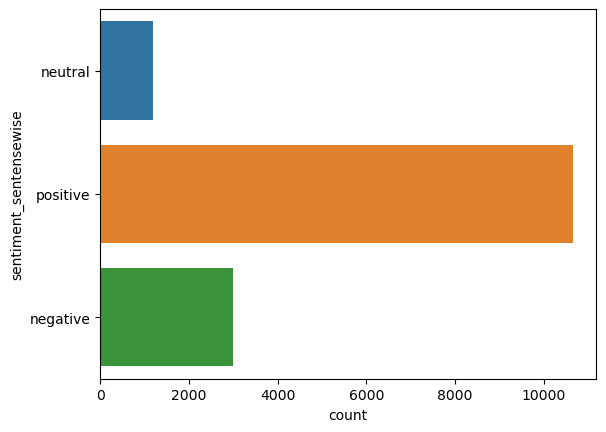

In [30]:
sns.countplot(y='sentiment_sentensewise', data=df)

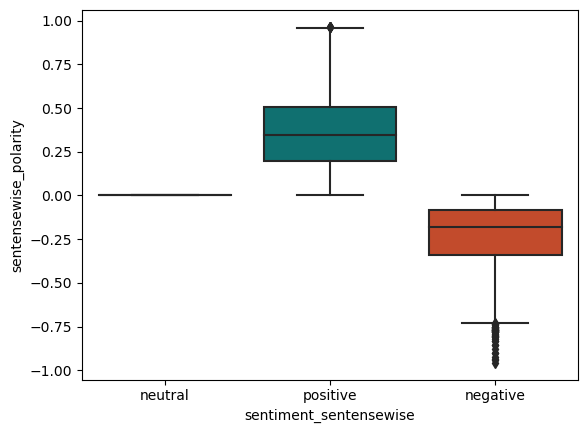

In [31]:
sns.boxplot(y='sentensewise_polarity', 
            x='sentiment_sentensewise',
            palette=['#b2d8d8',"#008080", '#db3d13'], 
            data=df);

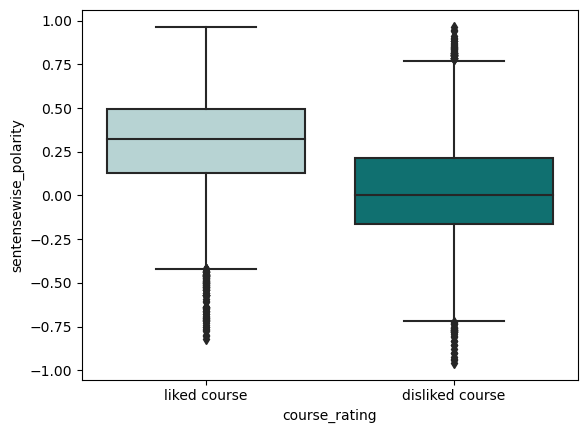

In [32]:
sns.boxplot(y='sentensewise_polarity', 
            x='course_rating',
            palette=['#b2d8d8',"#008080", '#db3d13'], 
            data=df);